<a href="https://colab.research.google.com/github/JosephRamirez-F4fu/FDS-2023-1-CC52/blob/master/Copia_de_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cargado de los datos

In [103]:
df = pd.read_csv('bike_buyers.csv')

# Inspección de los datos

In [104]:
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [105]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [106]:
#ajuste en el tipo de datos para manejo simplificado
df['Marital Status'] = df['Marital Status'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Home Owner'] = df['Home Owner'].astype('category')
df['Commute Distance'] = df['Commute Distance'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Purchased Bike'] = df['Purchased Bike'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                1000 non-null   int64   
 1   Marital Status    993 non-null    category
 2   Gender            989 non-null    category
 3   Income            994 non-null    float64 
 4   Children          992 non-null    float64 
 5   Education         1000 non-null   category
 6   Occupation        1000 non-null   category
 7   Home Owner        996 non-null    category
 8   Cars              991 non-null    float64 
 9   Commute Distance  1000 non-null   category
 10  Region            1000 non-null   category
 11  Age               992 non-null    float64 
 12  Purchased Bike    1000 non-null   category
dtypes: category(8), float64(4), int64(1)
memory usage: 48.2 KB


# VISUALIZACIÓN DE LOS DATOS

<bound method Figure.show of <Figure size 1000x800 with 4 Axes>>

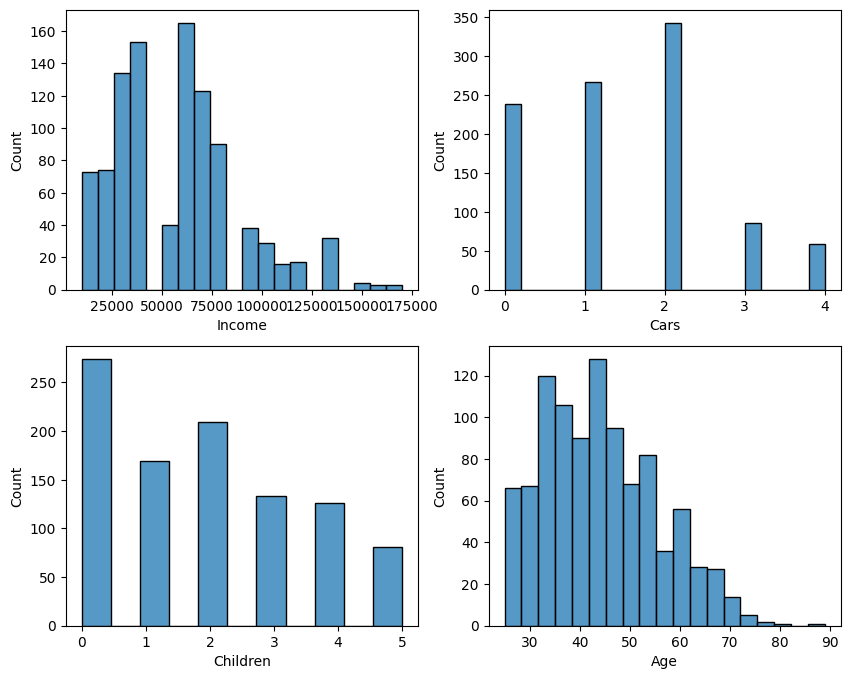

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
numeric_cols = df.drop('ID', axis=1).select_dtypes(include='number').columns
for i in range(len(numeric_cols)):
    sns.histplot(data=df[numeric_cols[i]], ax= axes[i%2,int(i/2)])
fig.show

# PRE-PROCESAMIENTO DE DATOS

In [108]:
#Datos repetidos?
len(df['ID'].unique()) != len(df['ID'])

False

In [109]:
#elimina columnas con un porcentaje de datos faltantes mayor a 20%
percent = 0.20
df = df.dropna(thresh = df.shape[0] - np.ceil(df.shape[0] * percent), axis=1)
print(list(df.columns))

['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age', 'Purchased Bike']


In [110]:
#Crear una copia de ID y Purchased Bike
df['Purchased Bike'].replace({'No': 0, 'Yes': 1}, inplace=True)
df_index = df[['ID', 'Purchased Bike']]
df_index.columns = ['ID', 'Target']
df = df.drop(['ID'], axis = 1)

In [111]:
df_index.to_csv('index_data.csv',sep=';', index=False)

In [112]:
#separamos las variables numericas de las no numericas
numeric_cols = df.select_dtypes(include='number').columns
categoric_cols = df.select_dtypes(include='category').columns

In [113]:
#Revisar que no exista un error de ingreso
for col in categoric_cols:
    categorias = df[col].cat.categories
    print(f"{col}:\n{[c for c in categorias]}")

Marital Status:
['Married', 'Single']
Gender:
['Female', 'Male']
Education:
['Bachelors', 'Graduate Degree', 'High School', 'Partial College', 'Partial High School']
Occupation:
['Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual']
Home Owner:
['No', 'Yes']
Commute Distance:
['0-1 Miles', '1-2 Miles', '10+ Miles', '2-5 Miles', '5-10 Miles']
Region:
['Europe', 'North America', 'Pacific']
Purchased Bike:
[0, 1]


In [114]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    df_outliers = df[(df[col] < min) | (df[col] > max)][col]
    print(str(col), df_outliers.shape[0])

Income 10
Children 0
Cars 59
Age 4


In [115]:
#Reemplazar los datos faltantes de variables numericas con la mediana
for col in numeric_cols:
    df[col].fillna(value=df[col].median(), inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Marital Status    993 non-null    category
 1   Gender            989 non-null    category
 2   Income            1000 non-null   float64 
 3   Children          1000 non-null   float64 
 4   Education         1000 non-null   category
 5   Occupation        1000 non-null   category
 6   Home Owner        996 non-null    category
 7   Cars              1000 non-null   float64 
 8   Commute Distance  1000 non-null   category
 9   Region            1000 non-null   category
 10  Age               1000 non-null   float64 
 11  Purchased Bike    1000 non-null   category
dtypes: category(8), float64(4)
memory usage: 40.4 KB


In [117]:
#Reemplazar valores categoricos faltantes por la moda
for col in categoric_cols[0:]:
    df[col].fillna(value=df[col].mode()[0], inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Marital Status    1000 non-null   category
 1   Gender            1000 non-null   category
 2   Income            1000 non-null   float64 
 3   Children          1000 non-null   float64 
 4   Education         1000 non-null   category
 5   Occupation        1000 non-null   category
 6   Home Owner        1000 non-null   category
 7   Cars              1000 non-null   float64 
 8   Commute Distance  1000 non-null   category
 9   Region            1000 non-null   category
 10  Age               1000 non-null   float64 
 11  Purchased Bike    1000 non-null   category
dtypes: category(8), float64(4)
memory usage: 40.4 KB


In [119]:
#data necesaria para Requerimientos
df.to_csv('requirement_data.csv',sep=';', index=False)

CREACION DE NUEVAS COLUMNAS`

In [120]:
#Se trata de un rango por lo cual tambien se puede tratar como una variable jerarquica
df['Ctgr Commute Distance'] = df['Commute Distance'].replace({'0-1 Miles': 1,'1-2 Miles': 2, '2-5 Miles': 3, '5-10 Miles': 4, '10+ Miles': 5}).astype('int64')

In [121]:
df['LogIncome'] = round(np.log(df['Income']) + 1, 4)
df['LogAge'] = round(np.log(df['Age']) + 1, 4)
df['CatgrIncome'] = pd.qcut(df['Income'], 3, labels=['Bajo', 'Medio', 'Alto'])
#df['CatgrIncome'] = pd.qcut(df['Income'], 5, labels=['E', 'D', 'C', 'B', 'A'])
df['CtgrCars'] = pd.qcut(df['Income'], 5, labels=[1, 2, 3, 4, 5])
df['CtgrCars'] = df['CtgrCars'].astype('int8')
#df['CatIncome'] = pd.qcut(df['Income'], bins=[0, 2, 4, 6], labels=['Bajo', 'Medio', 'Alto'])
#df['ColumnaCategorica'] = pd.qcut(df['ColumnaNumerica'], q=3, labels=['Bajo', 'Medio', 'Alto'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Marital Status         1000 non-null   category
 1   Gender                 1000 non-null   category
 2   Income                 1000 non-null   float64 
 3   Children               1000 non-null   float64 
 4   Education              1000 non-null   category
 5   Occupation             1000 non-null   category
 6   Home Owner             1000 non-null   category
 7   Cars                   1000 non-null   float64 
 8   Commute Distance       1000 non-null   category
 9   Region                 1000 non-null   category
 10  Age                    1000 non-null   float64 
 11  Purchased Bike         1000 non-null   category
 12  Ctgr Commute Distance  1000 non-null   int64   
 13  LogIncome              1000 non-null   float64 
 14  LogAge                 1000 non-null   fl

In [123]:
#separamos las variables numericas de las no numericas
numeric_cols = df.select_dtypes(include='number').columns
categoric_cols = df.select_dtypes(include='category').columns

In [124]:
categoric_cols.to_list()

['Marital Status',
 'Gender',
 'Education',
 'Occupation',
 'Home Owner',
 'Commute Distance',
 'Region',
 'Purchased Bike',
 'CatgrIncome']

In [125]:
categorical=pd.get_dummies(df[categoric_cols], columns=categoric_cols, drop_first=True)

categorical.head()

,Marital Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Home Owner_Yes,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_North America,Region_Pacific,Purchased Bike_1,CatgrIncome_Medio,CatgrIncome_Alto
0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [126]:
categorical.columns = ['Marital Status',
    'Gender',
    'Education_1',
    'Education_2',
    'Education_3',
    'Education_4',
    'Occupation_1',
    'Occupation_2',
    'Occupation_3',
    'Occupation_4',
    'Home Owner',
    'Commute Distance_1',
    'Commute Distance_2',
    'Commute Distance_3',
    'Commute Distance_4',
    'Region_1',
    'Region_2','Target',
    'Ctgr Income_1',
    'Ctgr Income_2',
]

In [127]:
processed_data = pd.merge(df.select_dtypes(include='number'), categorical, left_index=True, right_index=True)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 1000 non-null   float64
 1   Children               1000 non-null   float64
 2   Cars                   1000 non-null   float64
 3   Age                    1000 non-null   float64
 4   Ctgr Commute Distance  1000 non-null   int64  
 5   LogIncome              1000 non-null   float64
 6   LogAge                 1000 non-null   float64
 7   CtgrCars               1000 non-null   int8   
 8   Marital Status         1000 non-null   uint8  
 9   Gender                 1000 non-null   uint8  
 10  Education_1            1000 non-null   uint8  
 11  Education_2            1000 non-null   uint8  
 12  Education_3            1000 non-null   uint8  
 13  Education_4            1000 non-null   uint8  
 14  Occupation_1           1000 non-null   uint8  
 15  Occup

In [128]:
processed_data.to_csv('processed_data1.csv',sep=';', index=False)

PRIMERA PRUEBA DEL MODELO DETERMINA QUE EL LOGARITMO DE Income TIENE UNA MAYOR IMPORTANCIA QUE Income
-SE ENCUENTRA UNA ALTA CORRELACION ENTRE LA FORMA CATEGORICA DE Cars, entonces se elimina CatgCars por tener menor importancia

In [129]:
processed_data = processed_data.drop(['Income',
              'CtgrCars',
              ], axis=1)

In [130]:
processed_data.to_csv('processed_data2.csv',sep=';', index=False)

In [131]:
'''df = df.drop([
  'Income',
  'CtgrCars',
  'Ctgr Income_1',
  'Ctgr Income_2',
  'Ctgr Income_3',
  'Ctgr Income_4',
  'Commute Distance_1',
  'Commute Distance_2',
  'Commute Distance_3',
  'Commute Distance_4'
], axis=1)'''

"df = df.drop([\n  'Income',\n  'CtgrCars',\n  'Ctgr Income_1',\n  'Ctgr Income_2',\n  'Ctgr Income_3',\n  'Ctgr Income_4',\n  'Commute Distance_1',\n  'Commute Distance_2',\n  'Commute Distance_3',\n  'Commute Distance_4'\n], axis=1)"